In [49]:
from PIL import Image, ImageFilter


import numpy as np

In [50]:
my_pic = Image.open("me.jpg")
my_pic.show()

In [51]:
my_pic.size

(736, 489)

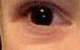

In [52]:
left_eye = (230, 150, 310, 200)
left_eye_image = my_pic.crop(left_eye)
left_eye_image

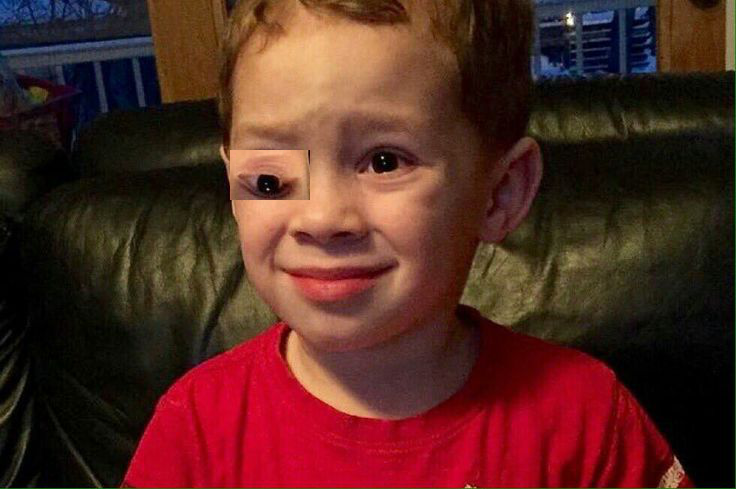

In [53]:
left_eye_image= left_eye_image.transpose(Image.Transpose.ROTATE_180)

my_pic.paste(left_eye_image, left_eye)
my_pic

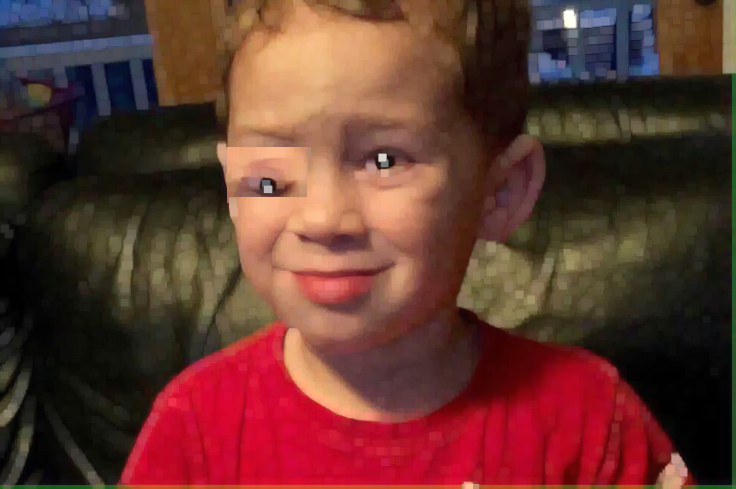

In [54]:
temp = my_pic.filter(ImageFilter.MaxFilter(7))
temp.save("temp.png")
temp

In [55]:
baw = my_pic.convert("L")


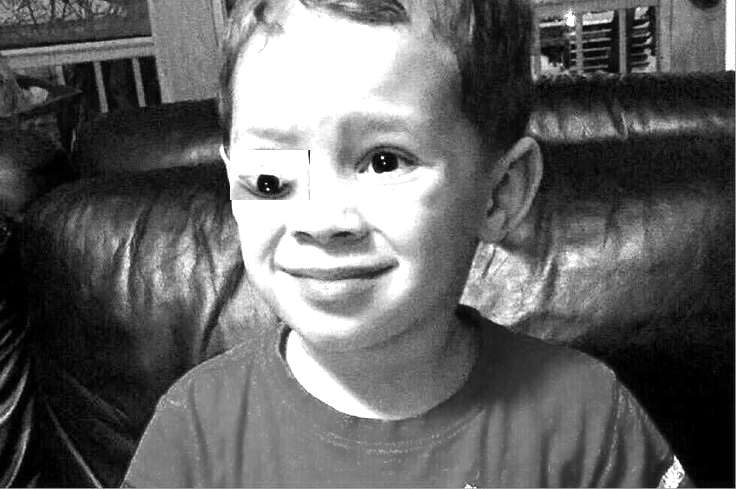

In [56]:
baw.point(lambda i: i*2)

In [57]:
##TODO: Run this later

# import cv2
# img=cv2.imread('Tulips.jpg') # imread() returns a numpy array containing values that represents pixel level data.
# clahe=cv2.createCLAHE() #createCLAHE method to perform adaptive histogram equalization
# gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColor() method is used to convert an image from one color space to another
# enh_img=clahe.apply(gray_img)
# #cv2.imwrite('enhanced.png',enh_img)
# rgb_image = cv2.cvtColor(enh_img, cv2.COLOR_GRAY2RGB)
# cv2.imwrite('colorenhanced.png',rgb_image)

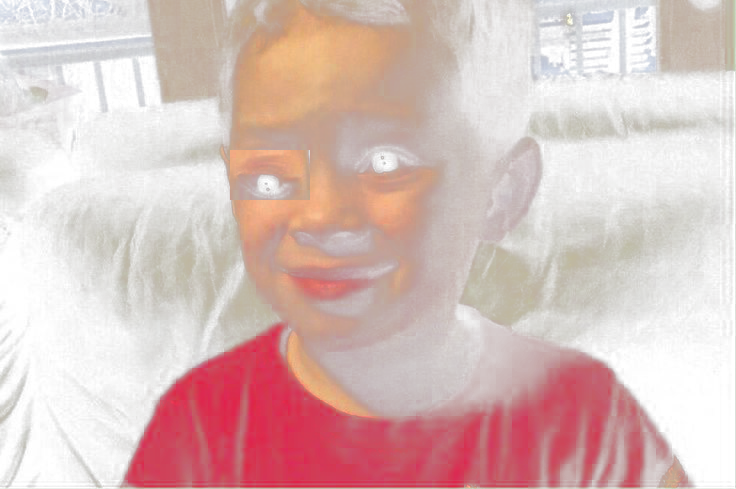

In [58]:
my_pic_enhanced = my_pic.convert("RGBA")

source = my_pic_enhanced.split()

R, G, B, A = 0, 1, 2, 3


# paste the processed band back, but only where red was < 100
source[A].paste(source[R])

# build a new multiband image
temp2 = Image.merge(my_pic_enhanced.mode, source)
temp2.save("temp.png")
temp2

In [59]:
def temporary(value):
    return value * 2

In [60]:
temporary = lambda value: value*2

temporary(5)

10

In [73]:
maze = """
WWWWWEWWWW
WWWOOOWWOW
WWOOWWWOOW
WWWOOOOOWW
WWWWWSWWWW
"""

maze = """
WOWWOOOOOWW
WOOOOWOWWWW
WOWOWWOWWWW
WOWOOOWOOOW
WOWWWOOOWOW
OOWWWWWWWOE
OWOOOOOOWOW
OOOWWWWOWOW
WWWOOOOOWOW
WWWWSWWOOOW
"""

maze = maze.strip()
row, col = 0, 0

In [62]:
row = len(maze.splitlines())
col = len(maze.splitlines()[0])

(row, col)

(10, 11)

In [63]:
size_of_square= 50;

walk = Image.new("L", (size_of_square,size_of_square), 255)
wall = Image.new("L", (size_of_square,size_of_square), 0)
path = Image.new("L", (size_of_square,size_of_square), 122)


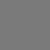

In [64]:
path

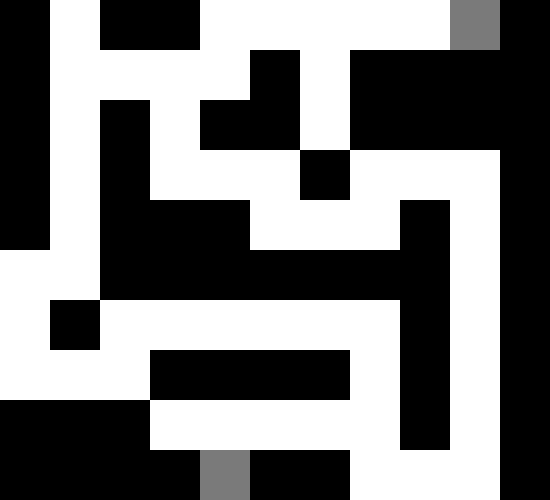

In [65]:
maze_image = Image.new("L", (size_of_square*col, size_of_square*row), 255)

# i,j = (4,2)
# maze_image.paste(wall, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))


for i, line in enumerate(maze.splitlines()):
    for j, letter in enumerate(line.strip()):
        if letter == "W":
            maze_image.paste(wall, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
        else:
            if letter in ["S", "E"]:
                maze_image.paste(path, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
            else:
                maze_image.paste(walk, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
        # print(f"{i}, {j}, {letter}")
maze_image

In [66]:
maze_image.save("temp.png")

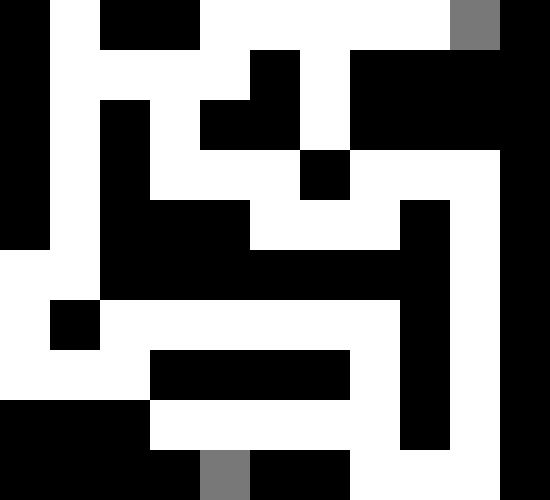

In [67]:
WALL = 0
WALKWAY = 1
START = 2
END = 3
BACKTRACK = 4
WALLOFF = 5
junctions = []


maze_array = np.zeros((1, 1))
start_pos = (0,0)
end_pos = (0,0)

def reset():
    global maze_array, start_pos,end_pos, maze, row, col

    row = len(maze.splitlines())
    col = len(maze.splitlines()[0])

    maze_array = np.zeros((row, col))

    for i, line in enumerate(maze.splitlines()):
        for j, let in enumerate(line):
            if (let == "W"):
                maze_array[i][j] = WALL
            if (let == "S"):
                maze_array[i][j] = START
                start_pos= (i,j)
            if (let == "E"):
                maze_array[i][j] = END
                end_pos = (i,j)
            if (let == "O"):
                maze_array[i][j] = WALKWAY

        
        # match (let):
        #     case "W": 
        #         maze_array[i][j] = WALL
        #     case "S":
        #         maze_array[i][j] = START
        #     case "E":
        #         maze_array[i][j] = END
        #     case "O":
        #         maze_array[i][j] = WALKWAY

def draw():
    global maze_array

    row, col = maze_array.shape
    size_of_square= 50
    walk = Image.new("L", (size_of_square,size_of_square), 255)
    wall = Image.new("L", (size_of_square,size_of_square), 0)
    path = Image.new("L", (size_of_square,size_of_square), 120)
    
    maze_image = Image.new("L", (size_of_square*col, size_of_square*row), 255)
    
    for i, line in enumerate(maze_array):
        for j, val in enumerate(line):
            if val in [START, END, BACKTRACK]:
                maze_image.paste(path, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
            if val in [WALL]:
                maze_image.paste(wall, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
            if val in [WALLOFF, WALKWAY]:
                maze_image.paste(walk, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
    return maze_image
reset()
draw()

In [68]:
maze_array

array([[0., 1., 0., 0., 1., 1., 1., 1., 1., 3., 0.],
       [0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 2., 0., 0., 1., 1., 1., 0.]])

In [69]:
maze_array

array([[0., 1., 0., 0., 1., 1., 1., 1., 1., 3., 0.],
       [0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 2., 0., 0., 1., 1., 1., 0.]])

In [70]:
def left(x:int,y:int):
    if y<1:
        return
    return (x, y-1)

def right(x:int,y:int):
    if y>=col-1:
        return
    return (x, y+1)

def up(x:int,y:int):
    if x<1:
        return
    return (x-1, y)

def down(x:int,y:int):
    if x>=row-1:
        return
    return (x+1, y)

def get_legal_directions(p, backtrack = False):
    """Gets the legal directions to move from a point on the maze; Considers the 2 cases; when you are backtracking and when you are not.

    Args:
        p (int, int): the x and y coordinate of the point
        backtrack (bool, optional): whether you are backtracking or not; checks for walkway if not baacktracking, 
        checks for backtrack otherwise. Defaults to False.

    Returns:
        List[int]: the legal directions you can go:
            0 -> Left,
            1 -> Right
            2 -> Up
            3 -> Down
    """
    x,y = p
    ret = []
    check = [WALKWAY, END] if not backtrack else [BACKTRACK]
    # check = [WALKWAY, END]
    
    # #Left:
    # if cell:= left(x,y):
    #     if maze_array[cell] in check:
    #         ret.append(0)
    # #Right
    # if cell:= right(x,y):
    #     if maze_array[cell] in check:
    #         ret.append(1)
    # #Up
    # if cell:= up(x,y):
    #     if maze_array[cell] in check:
    #         ret.append(2)
    # #Down
    # if cell:= down(x,y):
    #     if maze_array[cell] in check:
    #         ret.append(3)
    
    for direction in (left, right, up, down):
        if cell:= direction(x,y):
            if maze_array[cell] in check:
                ret.append(direction)
    return ret
    #Everyone lost interest here, so I stopped...
get_legal_directions((6,2))

[<function __main__.right(x: int, y: int)>,
 <function __main__.down(x: int, y: int)>]

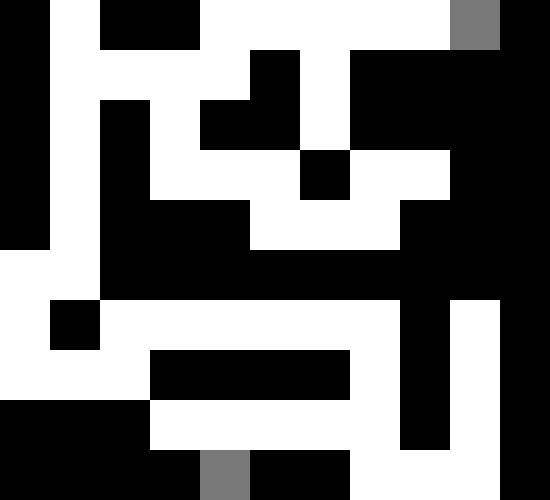

In [23]:
if cell:= up(0,0):
    print(cell)

draw()

In [74]:
reset()
present_position = start_pos
backtrack = False
while True:
    # draw().show()
    if present_position == end_pos:
        break
    if backtrack:
        if present_position in junctions:
            backtrack = False
            junctions.pop()
        else:
            legal_direction= get_legal_directions(present_position, backtrack)
            
            if len(legal_direction) ==0:
                print("There is no solution!")
                break
            
            legal_direction = legal_direction[0]
            maze_array[present_position] = WALLOFF
            present_position = legal_direction(*present_position)
            continue
    legal_direction = get_legal_directions(present_position)
    if len(legal_direction) == 0:
        maze_array[present_position] = BACKTRACK
        backtrack = True
        continue
    if len(legal_direction)>1:
        junctions.append(present_position)
    maze_array[present_position] = BACKTRACK
    present_position= legal_direction[0](*present_position)



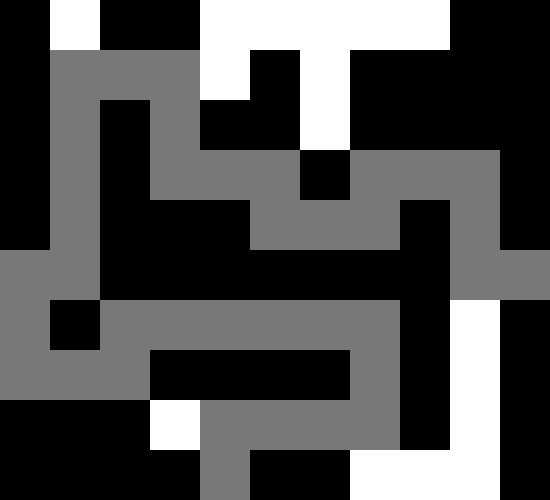

In [75]:
draw()

In [13]:
if w:=up(1,0):
    print(w, "yay")
else:
    print("cool")

(0, 0) yay


Class is kinda over
==

If you have any question feels free to ask...

Felt bad when everyone left essentially and I stopped


In [129]:
maze_array[None]

array([[[0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]]])

In [9]:
from PIL import Image, ImageFilter
import numpy as np


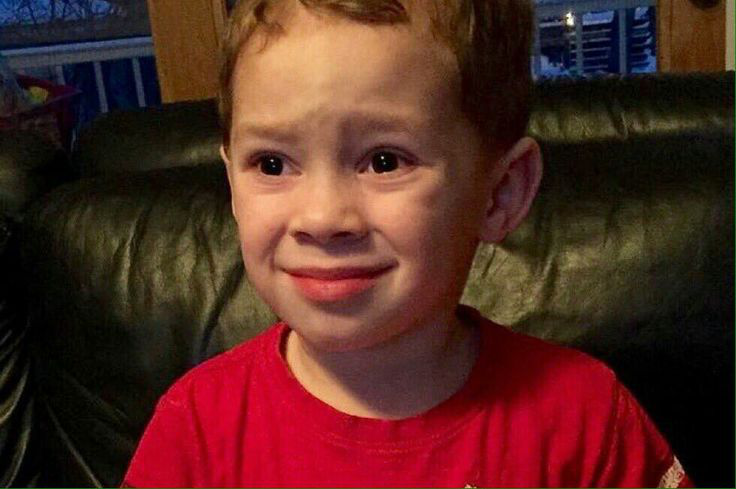

In [23]:
im = Image.open("me.jpg")
im

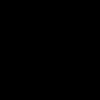

In [30]:
Image.new("L", (100, 100))

In [7]:
box_end= (200,100, 300,200)
region =im.crop(box_end)
region.show()

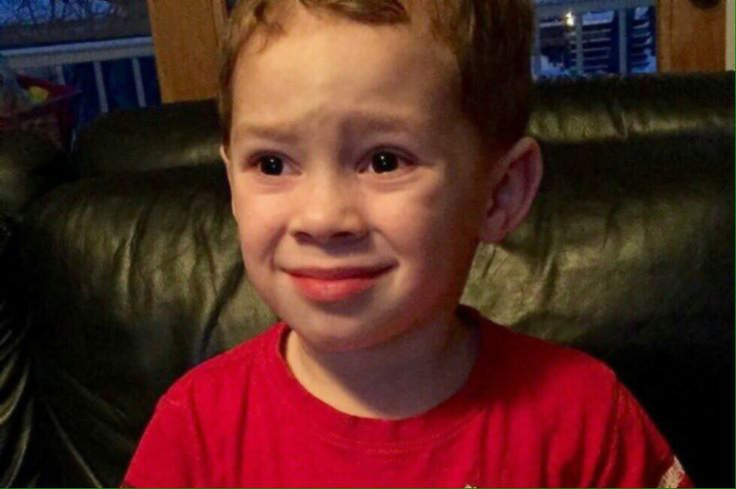

In [15]:
out = im.filter(ImageFilter.SMOOTH_MORE)
out

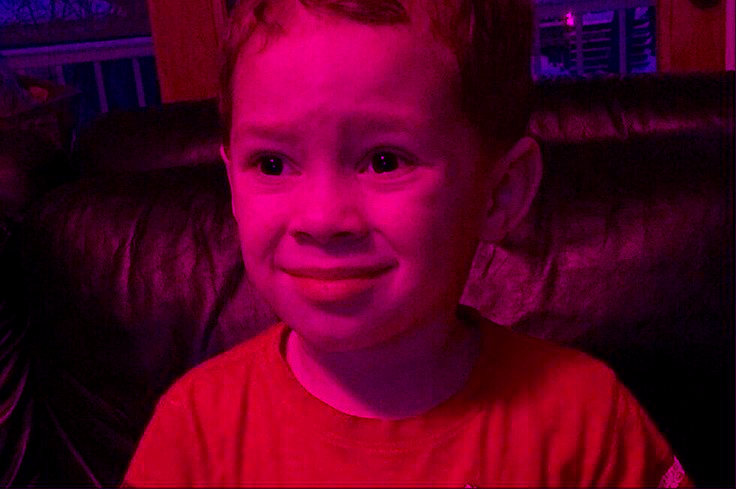

In [26]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

mask = source[G].point(lambda i: 0)

source[G].paste(mask)

# build a new multiband image
change = Image.merge(im.mode, source)
change

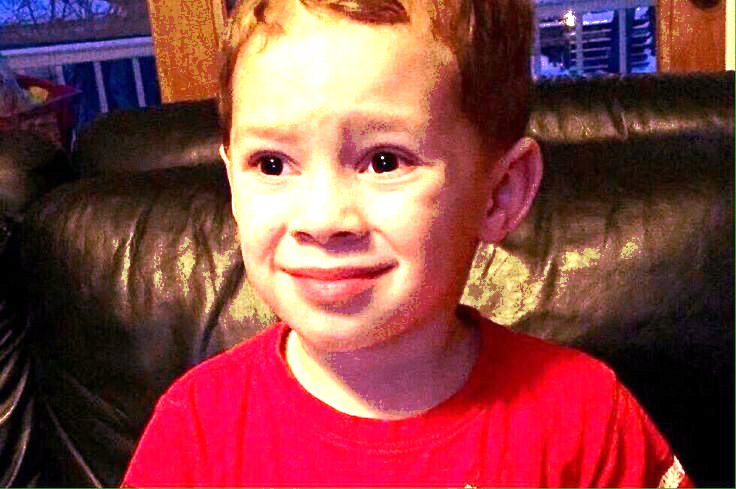

In [19]:
out = im.point(lambda i: i * 2)
out

In [31]:
new_im = im.convert("RGBA")

In [34]:
sources = new_im.split()
A = 3

mask = sources[R].point(lambda x: 255 if x>100 else 0)
sources[A].paste(mask)

change = Image.merge("RGBA", sources)
change.save("temp.png")